In [51]:
! wget https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/advisor/wp-content/uploads/2023/07/top-20-small-dog-breeds.jpeg.jpg

--2024-03-24 14:52:44--  https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/advisor/wp-content/uploads/2023/07/top-20-small-dog-breeds.jpeg.jpg
正在查找主機 thumbor.forbes.com (thumbor.forbes.com)... 199.232.45.55
正在連接 thumbor.forbes.com (thumbor.forbes.com)|199.232.45.55|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 200 OK
長度: 32419 (32K) [image/jpeg]
儲存到：「top-20-small-dog-breeds.jpeg.jpg.1」

top-20-small-dog-br 100%[===================>]  31.66K  --.-KB/s  於 0.02s      

2024-03-24 14:52:44 (1.25 MB/s) - 已儲存 「top-20-small-dog-breeds.jpeg.jpg.1」 [32419/32419]



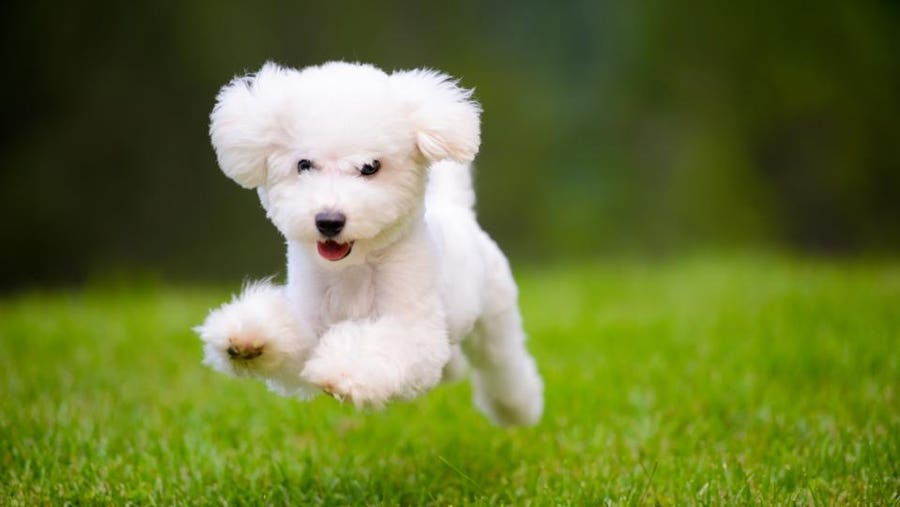

In [52]:
from PIL import Image
Image.open('top-20-small-dog-breeds.jpeg.jpg')

In [53]:
import requests
import json
from PIL import Image
import base64
from io import BytesIO

def image_to_base64(image_path):
    # 打開圖片
    with Image.open(image_path) as img:
        # 計算圖片高寬比例
        aspect_ratio = img.height / img.width
        # 根據比例調整新的高度
        new_height = int(300 * aspect_ratio)

        # 調整圖片大小
        resized_img = img.resize((300, new_height))

        # 創建圖片緩衝區
        img_buffer = BytesIO()
        
        # 將調整後的圖片儲存至緩衝區
        resized_img.save(img_buffer, format=img.format)

        # 將圖片轉換成 base64 格式
        img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')

        return img_base64

url = 'http://localhost:11434/api/generate'

img_path = "top-20-small-dog-breeds.jpeg.jpg"

# 將圖片轉換成 base64 字串
image_data = image_to_base64(img_path)

# 設定 POST 請求的 payload
payload = {
  "model": "llava",
  "prompt":"What is in this picture? Please turn the description into a filename",
  "stream": False,
  "images":[image_data]
}

# 發送 POST 請求
response = requests.post(url, json=payload)

# 輸出回應中的文字結果
print(response.json()['response'])


 dog_in_motion.jpg 


In [54]:
def getImageFilename(img_path):
    url = 'http://localhost:11434/api/generate'

    # 將圖片轉換成 base64 字串
    image_data = image_to_base64(img_path)
    
    # 設定 POST 請求的 payload
    payload = {
      "model": "llava",
      "prompt":"What is in this picture? Please turn the description into a filename",
      "stream": False,
      "images":[image_data]
    }
    
    # 發送 POST 請求
    response = requests.post(url, json=payload)
    
    # 輸出回應中的文字結果
    return response.json()['response'].strip().replace('"', '').split('.')[0]
    

In [55]:
getImageFilename("top-20-small-dog-breeds.jpeg.jpg")

'Playful_White_Dog'

In [56]:
! ls 

Course_240.ipynb
davidchiulargitdata_a_ultra_wide_shot_from_high_angle_of_asian__811f7b33-ba12-4bca-b075-040d2026d1cf.jpg
istockphoto-470604022-612x612.jpg
top-20-small-dog-breeds.jpeg.jpg
top-20-small-dog-breeds.jpeg.jpg.1


In [58]:
import glob
import os
for f in glob.glob('*.jpg'):
    #print(f)
    newfilename = getImageFilename(f)
    os.rename(f, newfilename + '.jpg')

In [59]:
! ls

Course_240.ipynb
K-Pop Female Artist in a Vintage Style Setting, Holding a Guitar.jpg
Lone_Tree_3D_Rendering.jpg
Puppy_Runs_in_Grass.jpg
top-20-small-dog-breeds.jpeg.jpg.1


In [60]:
! open "K-Pop Female Artist in a Vintage Style Setting, Holding a Guitar.jpg"